# Reuters Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Using the IMDB jupyter notebook as an example follow the prompts below to build a neural network to classify Reuters news wires into 46 different categories.

In [32]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_17800/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [33]:
# Add the necessary libraries and load the data.
from keras import backend
from keras.datasets import reuters
import numpy as np
import pandas as pd
import tensorflow as tf
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [34]:
import operator
# Print the word index
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [35]:
print(train_labels[:5])

[3 4 3 4 4]


In [38]:
# Here is the same function we created for vectorizing the IMDB data.
def vectorize_sequences(sequences, dimension=10000):
    word_matrix = tf.sparse.SparseTensor(
        # The non-zero locations in each row correspond to the word indices that are found in the document
        indices=[[row_idx, word_idx] for row_idx, word_indices in enumerate(sequences) for word_idx in set(word_indices)],
        # Use "1" as the value of each non-zero index (indicating the word is used in the document)
        values=[1 for row_idx, word_indices in enumerate(sequences) for word_idx in set(word_indices)],
        # The overall tensor shape
        dense_shape=[len(sequences), dimension]
    )
    # Optimize by ordering the non-zero indices in ascending row-major order
    word_matrix = tf.sparse.reorder(word_matrix)
    return word_matrix

In [39]:
# Split the training data into an 80/20 train/validation split, and then vectorize the train/test/validation datasets
from sklearn.model_selection import train_test_split
x_train_data, x_val_data, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
x_train = vectorize_sequences(x_train_data)
x_val = vectorize_sequences(x_val_data)
x_test = vectorize_sequences(test_data)

In [40]:
# Print the unique train labels (there should be 46)
# Print the shape of x_train
print(np.unique(y_train))
print(x_train.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
(7185, 10000)


In [46]:
# Keras has a built-in function for categorical encoding which we saw in the MNIST workbook
from keras.utils import to_categorical

In [48]:
# Convert the labels to categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(test_labels)

In [49]:
# Import models and layers from Keras
from keras import models
from keras import layers

In [80]:
# Build a sequential model network with 1 hidden layer. The input and hidden layer must have more hidden units
# than the number of classification categories. Things to think about: input and hidden layer activation,
# output activation for a multiclass problem, input shape, output units
model = models.Sequential()
model.add(layers.Dense(368, activation = 'relu', input_dim = (10000)))
model.add(layers.Dense(184, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [81]:
# Compile the model. Think about what optimizer, loss function, and metrics will you use.
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [82]:
# Train your model on the training data for 20 epochs and 500 batch size and a validation split = 20%.
history = model.fit(x_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data=(x_val, y_val))


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4097 - loss: 3.1075 - val_accuracy: 0.6756 - val_loss: 1.5955
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7288 - loss: 1.2762 - val_accuracy: 0.7563 - val_loss: 1.1641
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8216 - loss: 0.8041 - val_accuracy: 0.8024 - val_loss: 0.9664
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8997 - loss: 0.4824 - val_accuracy: 0.8164 - val_loss: 0.8949
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9373 - loss: 0.2951 - val_accuracy: 0.8236 - val_loss: 0.8767
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9588 - loss: 0.1843 - val_accuracy: 0.8253 - val_loss: 0.8643
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9617 - loss: 0.1388 - val_accuracy: 0.8280 - val_loss: 0.8957
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9664 - loss: 0.1185 - val_accuracy: 0.8325 - v

In [83]:
import matplotlib.pyplot as plt

In [84]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

    accuracy      loss  val_accuracy  val_loss
15  0.967432  0.093263      0.829716  0.989231
16  0.964788  0.093181      0.825264  1.007347
17  0.965901  0.088463      0.817474  1.028977
18  0.966458  0.086517      0.823595  1.025242
19  0.964509  0.082380      0.821369  1.006338


In [85]:
# Let's plot the loss and accuracy vs epochs
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

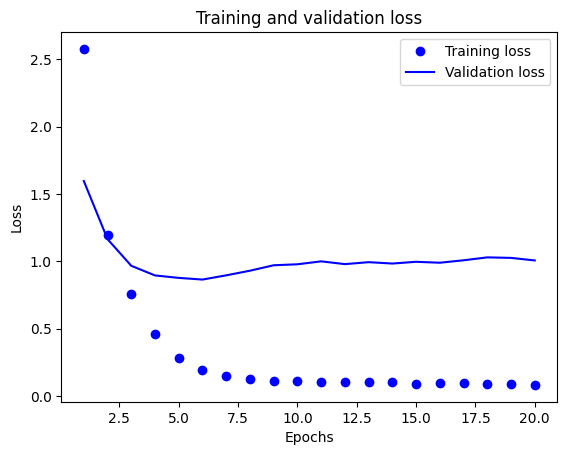

In [86]:
# Use the IMDB example to plot the validataion and training loss vs epochs

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

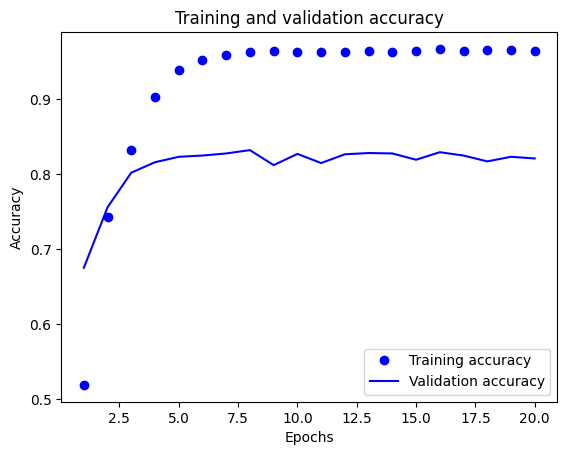

In [87]:
# Use the IMDB example to plot the validation and training accuracy vs epochs
plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [89]:
# Evaluate the model on the test data and print the results
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 1.0784
test_acc: 0.7960819005966187


Build a new model and try to get the  accuracy as high as you can. Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split. Try as many models as you like.  

Be sure to clear the session each time: `backend.clear_session()`. Copy your best model the end of the notebook.


## Best model:

In [108]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(1472, activation = 'relu', input_dim = (10000)))
model.add(layers.Dense(736, activation = 'relu'))
model.add(layers.Dense(368, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 300,
          verbose = 1)
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

Epoch 1/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4857 - loss: 2.3727
Epoch 2/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7975 - loss: 0.8650
Epoch 3/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9069 - loss: 0.3748
Epoch 4/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9548 - loss: 0.1961
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8112 - loss: 0.9678
['loss', 'compile_metrics']
[1.013105869293213, 0.8049866557121277]


## Conclusion:
1. activation function:      
    When I am doing this assignment I had more understanding of the differences between activation functions. The input activation function and output activation functions can be different based on what type of problems the model is trying to solve. For input and hidden layer I choose to use the fundamental one 'relu' as it works pretty well. For output function, since I am dealing with a multiclass classification problem where I can either use 'sigmoid' or 'softmax' as my output activation function and the test result is relatively the same.

2. Epochs:      
    I used 4 epochs because I notice the training accuracy is getting overfitted after that. 3 is a little less and 4 is just right. Turns out 4 epochs gives the best result for my model when everything else stays the same.

3. batch size:
    Although a smaller batch size takes more time to train, it brings better accuracy. However, batch size 250 seemms to be a little too low it was not giving any significant changes on the accuracy. I find 300 the best result of all the batch size I tried:[500, 550, 400, 300, 250]

Overall, this assignment is a pretty good one to get to know how to use the model for multiclass categorical problems. It is similar to the problem we had in week 1 assignment but a lot more complicated since this time we are analyzing using words(the number representation of words)). This reminds me of the object detection problem where I feel like wether it is words, image or voice lines, we are all transform it into series of numbers where the computer can understand it their way.



Source: https://keras.io/api/layers/activations/      
source: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/